Link to code: https://github.com/PeaceDucko/radboud-msc-ds-natcomp/tree/main/assignment_3

## Objectives of This Exercise
1. Familiarize yourself with the concepts behind negative selection
2. Apply a negative selection algorithm to a real-world dataset.

In this assignment, you will apply the negative selection algorithm to anomaly detection in sequence data.
The assignment consists of two parts: a “walk-through” part, in which the algorithm implementation is
explained using an artificial toy problem, and the assignment proper, in which you are expected to apply this
implementation to a more realistic dataset from the domain of network security.

This assignment description contains some introductory explanation and text. You are not expected to respond
to these parts in your report. Respond only to those parts that are labelled as **your task**.

## 1 Using the Negative Selection Algorithm
For this assignment, you can work with the author’s implementation of a negative selection algorithm (although
you are of course very welcome to write your own implementation, should you so wish). This implementation
is written in Java, which you need to have installed. The program itself and the data files needed for this
assignment can be found in the file negative-selection.zip, which you can download from Brightspace.

1. Compute the area under the receiver operating characteristic curve (AUC) to quantify how well the negative
selection algorithm with parameters n = 10,r = 4 discriminates individual English strings from Tagalog
strings by using the files english.train for training and english.test as well as tagalog.test for testing.
2. How does the AUC change when you modify the parameter r? Specifically, what behaviour do you observe
at r = 1 and r = 9 and how can you explain this behaviour? Which value of r leads to the best discrimination?
3. The folder lang contains strings from 4 other languages. Determine which of these languages can be best
discriminated from English using the negative selection algorithm, and for which of the languages this is
most difficult. Can you explain your findings?


### 1

In [1]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import math

For r=1:
AUC: 0.5084355229243147


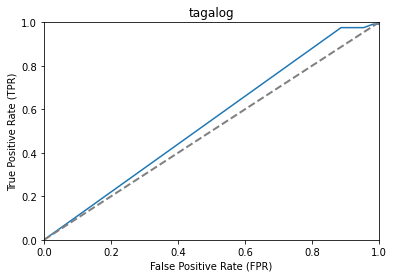

For r=2:
AUC: 0.6234911283626111


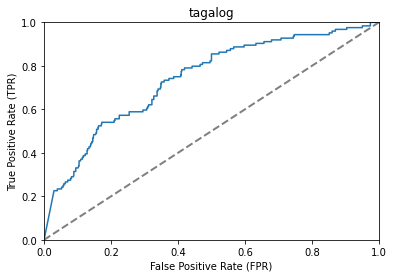

For r=3:
AUC: 0.6667492048579987


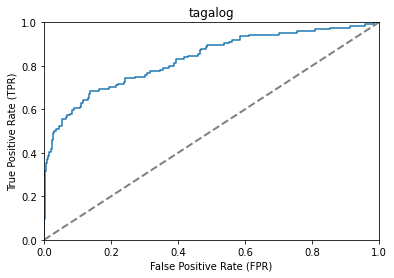

For r=4:
AUC: 0.6477910683136021


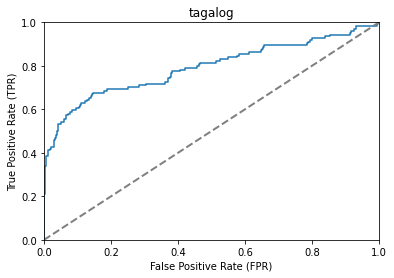

For r=5:
AUC: 0.6203198016003677


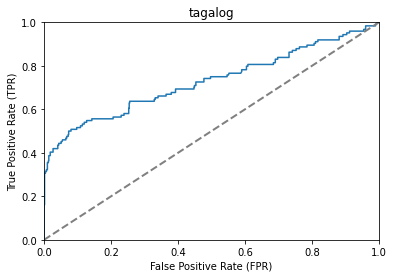

For r=6:
AUC: 0.6134919260105345


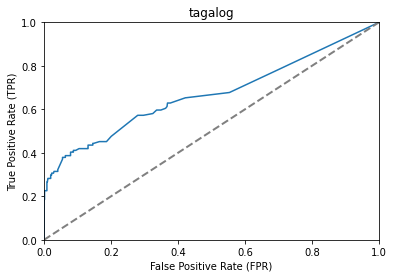

For r=7:
AUC: 0.5379975664404635


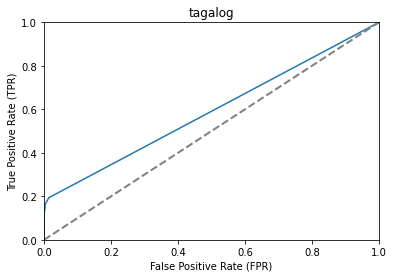

For r=8:
AUC: 0.5087365591397849


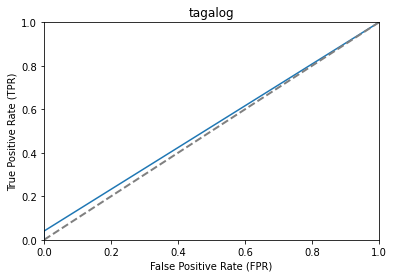

For r=9:
AUC: 0.5048387096774193


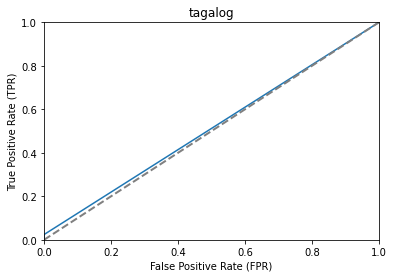

In [18]:
names = ["tagalog", "middle-english", "xhosa", "plautdietsch", "hiligaynon"]

def make_roc(r=4, name="tagalog"):
    #print(f"For r={r}:")
    res_eng = np.loadtxt(f"./r{r}/english.results")
    res_eng = np.c_[res_eng[:, np.newaxis], np.zeros(len(res_eng))] # 0 (positieve class)
    res_tag = np.loadtxt(f"./r{r}/" + name + ".results")
    res_tag = np.c_[res_tag[:, np.newaxis], np.ones(len(res_tag))] # 1
    #print("Lengths:", len(res_eng), len(res_tag))
    '''
    print("English",res_eng.shape)
    print(res_eng)
    print("Tagalog")
    print(res_tag)
    #'''

    res_merged = np.r_[res_eng, res_tag]
    #print(res_merged.shape)
    res_sorted = res_merged[np.argsort(res_merged[:,0])]
    #print(res_sorted)

    cutoff_values = [-1, *np.unique(res_sorted[:,0])] # (add a threshold value for which all classifications will be the anomaly class)

    list_TPR = []
    list_FPR = []
    #print(cutoff_values)
    for cutoff in cutoff_values:
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        # Values above cutoff classified as anomalous, below classified as normal
        for cur_val, true_class in res_sorted:
            if cur_val <= cutoff:
                predicted_class = 0.0
            else:
                predicted_class = 1.0
            
            if true_class == 0.0: # True class is 0.0 and predicted class is 0.0
                if predicted_class == 0.0:
                    TP += 1
                else: # True class is 0.0 and predicted class is 1.0
                    FN += 1
            else:
                if predicted_class == 0.0: # True class is 1.0 and predicted class is 0.0
                    FP += 1
                else: # True class is 1.0 and predicted class is 1.0
                    TN += 1
        
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        #print("For cutoff", cutoff, sensitivity, specificity)
        list_TPR.append(TPR)
        list_FPR.append(FPR)
        '''
        print("============")
        print("Cutoff:", cutoff)
        print("True positives", TP)
        print("False positives", FP)
        print("True negatives", TN)
        print("False negatives", FN)
        '''
    #print("result lengths",len(list_FPR),len(list_TPR))
    return list_TPR, list_FPR, name

def plot_roc(list_TPR, list_FPR, name):
    plt.figure()
    #print(list_TPR)
    #print(list_FPR)
    plt.title(name)
    print("AUC: "+str(AUC(list_TPR, list_FPR)))
    plt.plot(list_FPR, list_TPR)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.show()

def AUC(list_TPR, list_FPR):
    AUC = 0

    for i in zip(list_TPR, list_FPR):
        triangle = i[0]*i[1]/2
        trapezium = (1-i[1])*(1+i[0])/2
        i_AUC = 1/2 - i[1]/2 + i[0]/2

        AUC += i_AUC

    AUC = AUC/len(list_TPR)

    return AUC

for r in range(1,10):
    print(f"For r={r}:")
    plot_roc(*make_roc(r))


### 2

Out of all the values for r we tried $r \in (1,2,3,4,5,6,7,8,9)$, 3 was the best. For low values, you're basically matching letters in the alphabet which don't discriminate between language, and for high values the amount of matches stays around zero because the strings searched for are too specific.

### 3

Best R for tagalog was 3.
AUC: 0.6667492048579987


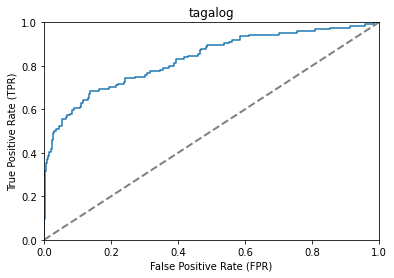

Best R for middle-english was 3.
AUC: 0.5211981566820281


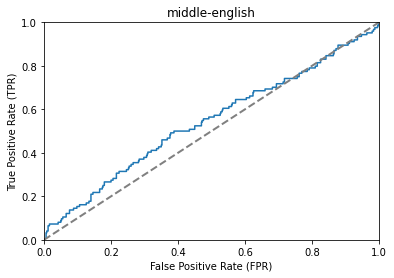

Best R for xhosa was 3.
AUC: 0.6945290218185609


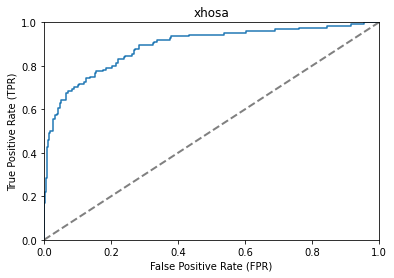

Best R for plautdietsch was 3.
AUC: 0.6369162963350238


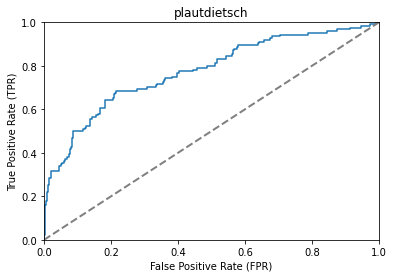

Best R for hiligaynon was 3.
AUC: 0.6709384016858491


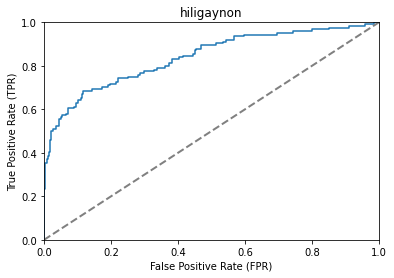

In [ ]:
for name in names:
    highest_auc = 0
    highest_rval = -1
    for r_val in range(1,10):
        list_tpr, list_frp, _ = make_roc(r_val, name)
        auc = AUC(list_tpr, list_frp)
        if auc > highest_auc:
            highest_auc = auc
            highest_rval = r_val
    
    print(f"Best R for {name} was {highest_rval}.")
    plot_roc(*make_roc(highest_rval, name))


The language that can be discriminated from English best is Xhosa. This makes sense seeing as it is from an entirely different language family than English. It is not as easy to say why Xhosa is easier to discriminate than tagalog or Hiligaynon, since those are both also from an entirely different language family and we arent linguists, but the differences are small enough that it may also be dependent on dataset or transliteration in case of a different alphabet.

Hardest to discriminate against is middle-English. This is due to the fact that middle-english is a form of the English language spoken after the Norman conquest (1066) until the late 15th century. Because of this there are many simularities and the system doesn't perform much better than guessing which is clear from the 0.52 AUC score.

## 2 Intrusion Detection for Unix Processes
1. The data format differs slightly, with the classification being stored in the separate .labels rather than
having two different files for normal and anomalous data.
2. More importantly, the sequences stored in the files are no longer of a fixed length. For training, this means
that you will need to pre-process each sequence to a set of fixed-length chunks (for instance, you could use
all substrings of a fixed length, or all non-overlapping substrings of a fixed length). For classification, you
also need to split the sequences into chunks, compute the number of matching patterns for each chunk
separately, and merge these counts together to a composite anomaly score (for instance, you could average
the individual counts).


In [19]:
problems = ["snd-cert", "snd-unm"]

SEQ_LEN = 10

def make_train():
    # We'll consider non-overlapping subsequences of length SEQ_LEN and discard any rest
    for problem in problems:
        data = np.loadtxt(f"{problem}/{problem}.train", dtype=str)

        chunks = []
        for line in data:
            newchunks = [line[ix:ix+SEQ_LEN] for ix in range(0, len(line), 100)]
            newchunks = list(filter(lambda x: len(x) == SEQ_LEN, newchunks))
            chunks.extend(newchunks)

        np.savetxt(f"./processed/{problem}.train", chunks, fmt="%s")

def make_test():
    # Test files
    for problem in problems:
        all_normal = np.array([])
        all_anomalous = np.array([])

        for i in range(1,4):
            data = np.loadtxt(f"{problem}/{problem}.{i}.test", dtype=str)
            labels = np.loadtxt(f"{problem}/{problem}.{i}.labels")

            normal_index = np.where(labels == 0) # Normal sequence
            anomalous_index = np.where(labels == 1) # Anomalous sequence

            normal_data = data[normal_index]
            anomalous_data = data[anomalous_index]

            all_normal = np.append(all_normal, normal_data)
            all_anomalous = np.append(all_anomalous, anomalous_data)
        
        normal_chunks = []
        total_len = 0
        total_lost = 0
        total_seq_lost = 0
        for line in all_normal:
            newchunks = [line[ix:ix+SEQ_LEN] for ix in range(0, len(line), 100)]
            old_len = sum(map(len,newchunks))
            total_len += old_len
            newchunks = list(filter(lambda x: len(x) == SEQ_LEN, newchunks))
            new_len = sum(map(len,newchunks))

            if new_len == 0:
                total_seq_lost +=1
            else:
                normal_chunks.extend(newchunks+[""])
            lost_data = old_len - new_len
            total_lost += lost_data

        np.savetxt(f"./processed/{problem}.normal.test", normal_chunks, fmt="%s")
        print(f"Normal: Out of {total_len} symbols we lost {total_lost} ({100*total_lost/total_len}%)")
        print(f"Normal: Out of {len(all_normal)} sequences we lost {total_seq_lost} ({100*total_seq_lost/len(all_normal)}%)")
    


        anom_chunks = []
        total_len = 0
        total_lost = 0
        total_seq_lost = 0
        for line in all_anomalous:
            newchunks = [line[ix:ix+SEQ_LEN] for ix in range(0, len(line), 100)]
            old_len = sum(map(len,newchunks))
            total_len += old_len
            newchunks = list(filter(lambda x: len(x) == SEQ_LEN, newchunks))
            new_len = sum(map(len,newchunks))

            if new_len == 0:
                total_seq_lost +=1
            else:
                anom_chunks.extend(newchunks+[""])
            lost_data = old_len - new_len
            total_lost += lost_data

        np.savetxt(f"./processed/{problem}.anomalous.test", anom_chunks, fmt="%s")
        print(f"Anomalous: Out of {total_len} symbols we lost {total_lost} ({100*total_lost/total_len}%)")
        print(f"Anomalous: Out of {len(all_anomalous)} sequences we lost {total_seq_lost} ({100*total_seq_lost/len(all_anomalous)}%)")
        
        '''
        print("shapes")
        print(all_normal.shape)
        print(all_anomalous.shape)

        print("Smallest normal length is ",min(map(len,list(all_normal))))
        print("Smallest anom length is ",min(map(len,list(all_anomalous))))

        plt.figure()
        plt.title("normal test")
        plt.hist(list(map(len,list(all_normal))), bins=50)
        plt.figure()
        plt.title("anom test")
        plt.hist(list(map(len,list(all_anomalous))), bins=50)
        print(list(map(len,list(all_anomalous))))
        '''

make_train()
make_test()


Normal: Out of 135343 symbols we lost 713 (0.526809661378867%)
Normal: Out of 1550 sequences we lost 92 (5.935483870967742%)
Anomalous: Out of 1498 symbols we lost 18 (1.2016021361815754%)
Anomalous: Out of 150 sequences we lost 2 (1.3333333333333333%)
Normal: Out of 138304 symbols we lost 594 (0.4294886626561777%)
Normal: Out of 1550 sequences we lost 75 (4.838709677419355%)
Anomalous: Out of 1500 symbols we lost 0 (0.0%)
Anomalous: Out of 150 sequences we lost 0 (0.0%)


Problem snd-cert
For r=1:
AUC: 0.6093157341231088


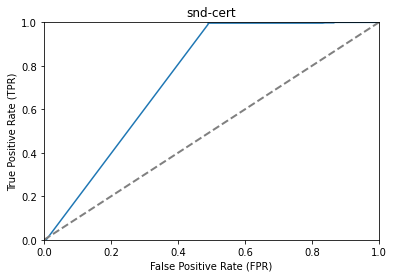

For r=2:
AUC: 0.6625888448118827


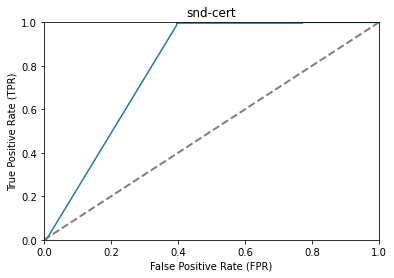

For r=3:
AUC: 0.6691654883941837


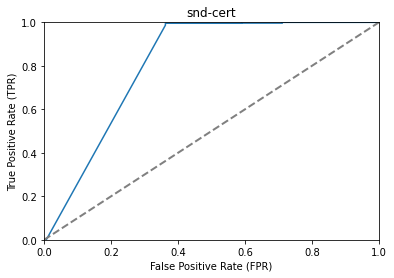

For r=4:
AUC: 0.670329151575566


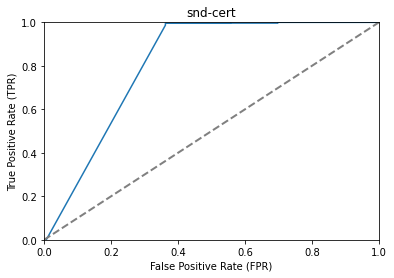

For r=5:
AUC: 0.6943552476075506


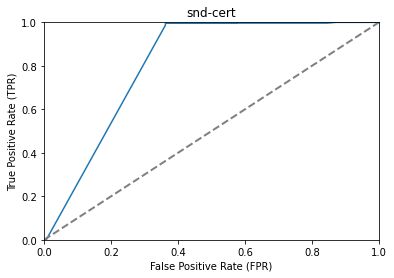

For r=6:
AUC: 0.727224402114163


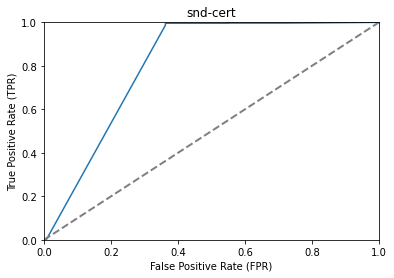

For r=7:
AUC: 0.7338355773698082


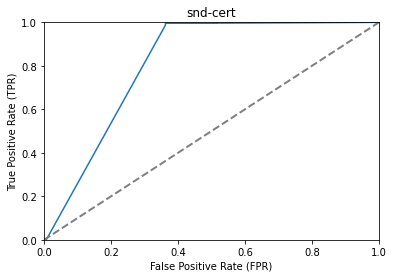

For r=8:
AUC: 0.7283593581646398


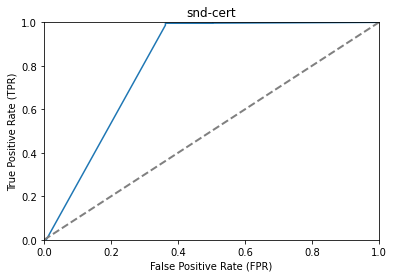

For r=9:
AUC: 0.7162145627003877


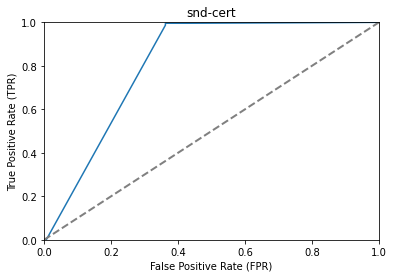

Problem snd-unm
For r=1:
AUC: 0.6008240007896767


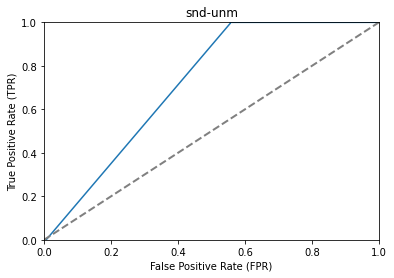

For r=2:
AUC: 0.6840600521447718


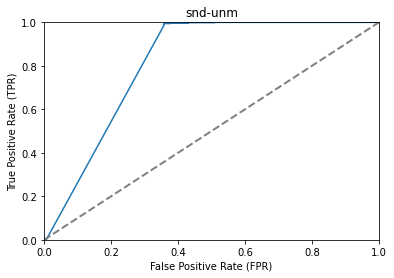

For r=3:
AUC: 0.7012026379261778


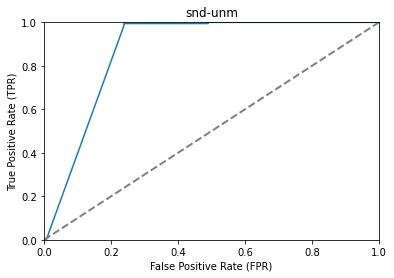

For r=4:
AUC: 0.70063983716428


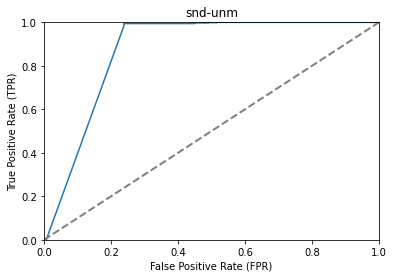

For r=5:
AUC: 0.7073302786384275


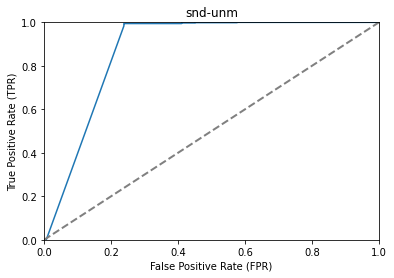

For r=6:
AUC: 0.7690346443072175


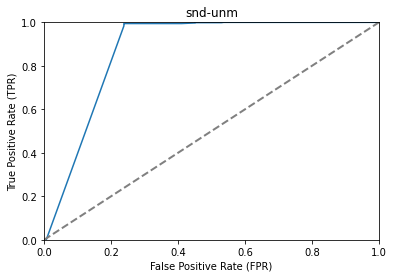

For r=7:
AUC: 0.7859486889570882


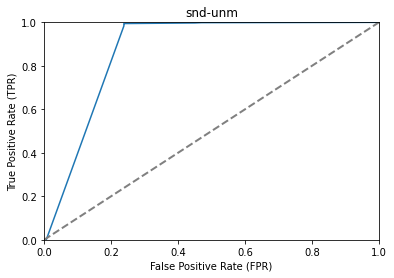

For r=8:
AUC: 0.7760577803179967


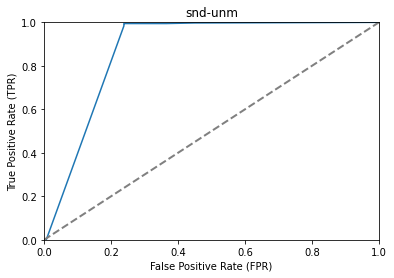

For r=9:
AUC: 0.7762726433831667


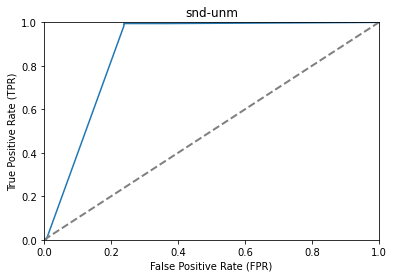

In [26]:
def make_roc_unix(r=4, problem="snd-cert"):
    #print(f"For r={r}:")
    with open(f"./results/unix_file_{problem}_1_n_amount_10_r_amount_{r}") as infile:
        data_norm = infile.read()
    with open(f"./results/unix_file_{problem}_2_n_amount_10_r_amount_{r}") as infile:
        data_anom = infile.read()

    data_norm = data_norm.replace("\n"," ").replace("  "," ").split("NaN")
    data_anom = data_anom.replace("\n"," ").replace("  "," ").split("NaN")

    res_norm = []
    res_anom = []

    for el in data_norm:
        row = np.fromstring(el, sep=" ")
        val = np.mean(row)
        res_norm.append(val)
    
    for el in data_anom:
        row = np.fromstring(el, sep=" ")
        val = np.mean(row)
        res_anom.append(val)
    
    res_norm = np.array(res_norm)
    res_anom = np.array(res_anom)

    res_norm = np.c_[res_norm[:, np.newaxis], np.zeros(len(res_norm))] # 0 (positieve class)
    res_anom = np.c_[res_anom[:, np.newaxis], np.ones(len(res_anom))] # 1

    '''
    print("Lengths:", len(res_norm), len(res_anom))
    
    print(res_norm.shape)
    print(res_anom.shape)
    '''

    res_merged = np.r_[res_norm, res_anom]
    #print(res_merged.shape)
    res_sorted = res_merged[np.argsort(res_merged[:,0])]
    #print(res_sorted)

    cutoff_values = [-1, *np.unique(res_sorted[:,0])] # (add a threshold value for which all classifications will be the anomaly class)

    list_TPR = []
    list_FPR = []
    #print(cutoff_values)
    for cutoff in cutoff_values:
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        # Values above cutoff classified as anomalous, below classified as normal
        for cur_val, true_class in res_sorted:
            if cur_val <= cutoff:
                predicted_class = 0.0
            else:
                predicted_class = 1.0
            
            if true_class == 0.0: # True class is 0.0 and predicted class is 0.0
                if predicted_class == 0.0:
                    TP += 1
                else: # True class is 0.0 and predicted class is 1.0
                    FN += 1
            else:
                if predicted_class == 0.0: # True class is 1.0 and predicted class is 0.0
                    FP += 1
                else: # True class is 1.0 and predicted class is 1.0
                    TN += 1
        
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        #print("For cutoff", cutoff, sensitivity, specificity)
        list_TPR.append(TPR)
        list_FPR.append(FPR)
        '''
        print("============")
        print("Cutoff:", cutoff)
        print("True positives", TP)
        print("False positives", FP)
        print("True negatives", TN)
        print("False negatives", FN)
        '''
    #print("result lengths",len(list_FPR),len(list_TPR))
    return list_TPR, list_FPR, problem

for problem in problems:
    print(f"Problem {problem}")
    for r in range(1,10):
        print(f"For r={r}:")
        plot_roc(*make_roc_unix(r=r, problem=problem))


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=89440646-9834-412c-9b8b-9adf276da239' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>